In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Air Quality Dataset

As someone who has always been environmentally conscious, this dataset immediately caught my eye. I believe that there are some very interesting insights which can be found from running a data analysis on this dataset. This dataset represents the greenhouse gas emissions along the supply chain.

Link(https://catalog.data.gov/dataset/supply-chain-greenhouse-gas-emission-factors-v1-3-by-naics-6)

In [ ]:
df = pd.read_csv('/content/SupplyChainGHGEmissionFactors_v1.3.0_NAICS_CO2e_USD2022.csv')
df.head()

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
3,111140,Wheat Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
4,111150,Corn Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0


In [ ]:
df.shape

(1016, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   2017 NAICS Code                                1016 non-null   int64  
 1   2017 NAICS Title                               1016 non-null   object 
 2   GHG                                            1016 non-null   object 
 3   Unit                                           1016 non-null   object 
 4   Supply Chain Emission Factors without Margins  1016 non-null   float64
 5   Margins of Supply Chain Emission Factors       1016 non-null   float64
 6   Supply Chain Emission Factors with Margins     1016 non-null   float64
 7   Reference USEEIO Code                          1016 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 63.6+ KB


In [ ]:
col = 'Supply Chain Emission Factors without Margins'
df[col].value_counts()

,count
Supply Chain Emission Factors without Margins,
0.111,36
0.108,31
0.221,21
0.144,20
0.103,17
...,...
0.265,1
0.046,1
0.311,1


In [ ]:
df[col].mode()

,Supply Chain Emission Factors without Margins
0,0.111


In [ ]:
min = df[col].min()
max = df[col].max()
print(min, max)

0.026 3.846


In [ ]:
mean = df[col].mean()
median = df[col].median()
mode = df[col].mode()
print(mean, median, mode)

0.264994094488189 0.159 0    0.111
Name: Supply Chain Emission Factors without Margins, dtype: float64


In [ ]:
range_value = max - min

print(range_value)

3.8200000000000003


In [ ]:
midrange = (min + max) / 2
print(midrange)

1.936


In [ ]:
q1 = df[col].quantile(0.25)
q2 = df[col].quantile(0.50)
q3 = df[col].quantile(0.75)
print(q1, q2, q3)

0.103 0.159 0.30225


In [ ]:
IQR = q3 - q1
print(IQR)

0.19925000000000004


In [ ]:
variance = df[col].var()
std_dev = df[col].std()
print(variance, std_dev)

0.09907905612272559 0.314768257806796


In [ ]:
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

print(outliers)

     2017 NAICS Code                                   2017 NAICS Title  \
2             111130                           Dry Pea and Bean Farming   
3             111140                                      Wheat Farming   
4             111150                                       Corn Farming   
5             111160                                       Rice Farming   
6             111191              Oilseed and Grain Combination Farming   
..               ...                                                ...   
867           562219    Other Nonhazardous Waste Treatment and Disposal   
868           562910                               Remediation Services   
869           562920                      Materials Recovery Facilities   
870           562991                   Septic Tank and Related Services   
871           562998  All Other Miscellaneous Waste Management Services   

          GHG                               Unit  \
2    All GHGs  kg CO2e/2022 USD, purchaser pric

# Histogram with Outliers


<Axes: >

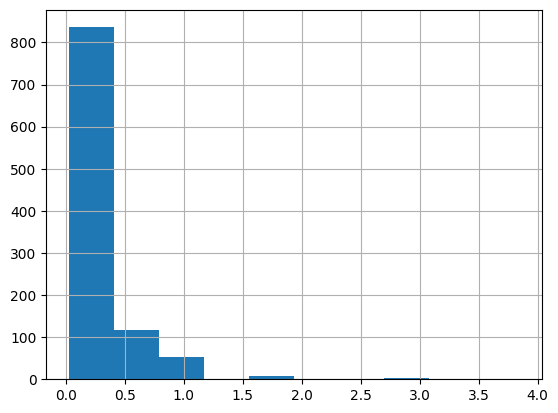

In [ ]:
df[col].hist()

<Axes: >

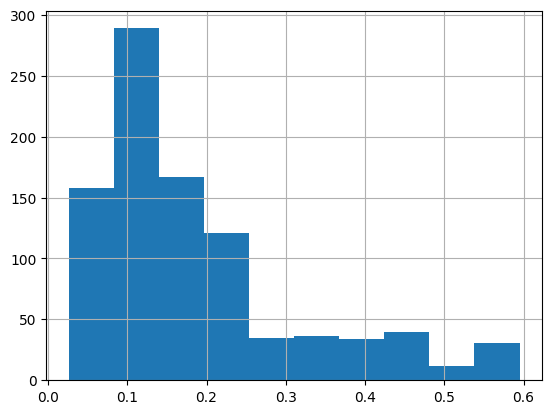

In [ ]:
df_without_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
df_without_outliers[col].hist()

<Axes: ylabel='Density'>

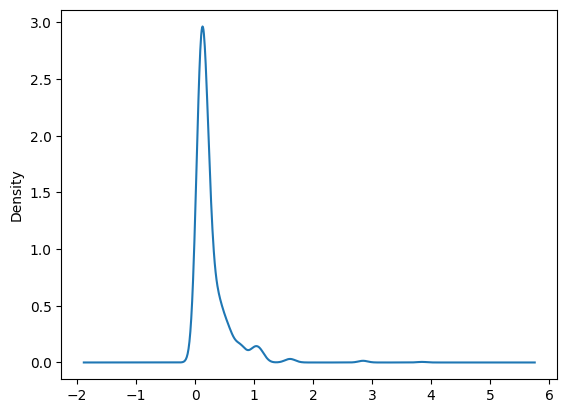

In [ ]:
df['Supply Chain Emission Factors without Margins'].plot.density()

<Axes: ylabel='Density'>

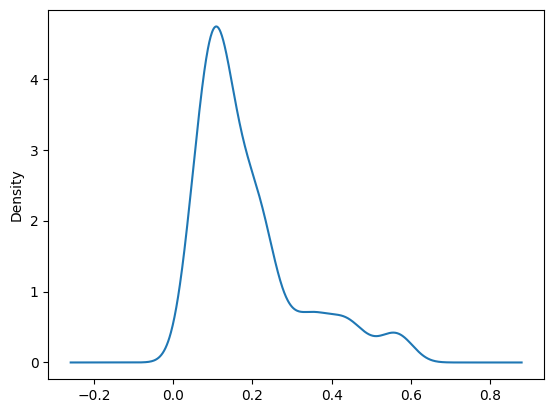

In [ ]:
df_without_outliers['Supply Chain Emission Factors without Margins'].plot.density()

# Interpretations of SEF(Supply Chain Emission Factors without Margins)

This represents the emissions released by a product's production and supply that excludes emissions tied to markups, retail, distribution, and other added costs beyond the direct supply chain.

# Possible Further Interpretations

This data can be further analyzed to identify solely supply chain production related emissions, or certain products that emit a disproportionate amount of GHGs (Green House Gasses) during parts of the supply chain unrelated to production.

In [ ]:
high_outliers = df[df[col] > upper_bound]

top_10_outliers = high_outliers.sort_values(by=col, ascending=False).head(10)
top_10_outliers['2017 NAICS Title']

,2017 NAICS Title
285,Cement Manufacturing
33,Dual-Purpose Cattle Ranching and Farming
31,Cattle Feedlots
30,Beef Cattle Ranching and Farming
32,Dairy Cattle and Milk Production
655,Pipeline Transportation of Refined Petroleum P...
653,Pipeline Transportation of Crude Oil
656,All Other Pipeline Transportation
654,Pipeline Transportation of Natural Gas
291,Gypsum Product Manufacturing


In [60]:
col2 = 'Supply Chain Emission Factors with Margins'
high_outliers = df[df[col2] > upper_bound]

top_10_outliers = high_outliers.sort_values(by=col2, ascending=False).head(10)
top_10_outliers['2017 NAICS Title']

,2017 NAICS Title
285,Cement Manufacturing
33,Dual-Purpose Cattle Ranching and Farming
31,Cattle Feedlots
30,Beef Cattle Ranching and Farming
32,Dairy Cattle and Milk Production
291,Gypsum Product Manufacturing
290,Lime Manufacturing
654,Pipeline Transportation of Natural Gas
655,Pipeline Transportation of Refined Petroleum P...
656,All Other Pipeline Transportation


# Basic Conclusions

It would seem that Cow related agriculture appears on the top 10 highest producers of GHGs quite often under various production titles suggesting that the Beef and Dairy industry are some of the highest producers of GHGs in the US.

# Challenges and Reflections

I found that interpreting the dataset quickly was difficult. Drawing conclusions quickly was also difficult from the data. This was mainly caused because I had to refresh my knowledge of PANDAS syntax

# __Extension of In Class Activity__

This section will explore the further steps and conclusions that that were drawn with the __Possible Further Interpretations__ and __Basic Conclusions__ Sections. This will include exporation of the GHG emissions of the cattle industry as well as GHGs along the supply chain.

In [ ]:
beef_industry = df[df['2017 NAICS Title'].str.contains('Cattle', case=False)].copy()
emissions_without_beef = df[~df['2017 NAICS Title'].str.contains('Cattle', case=False)].copy()

data = [
    beef_industry['Supply Chain Emission Factors without Margins'],
    emissions_without_beef['Supply Chain Emission Factors without Margins']
]

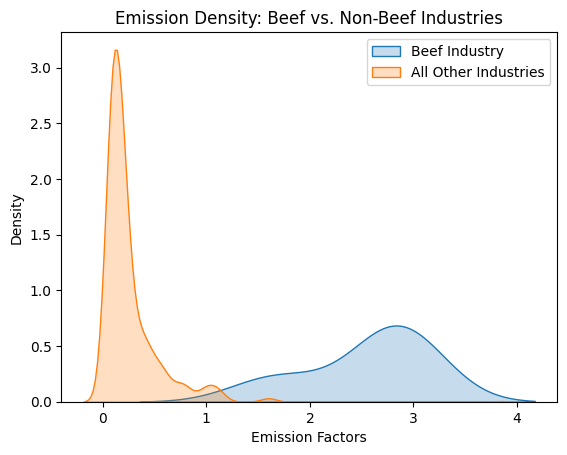

In [ ]:
sns.kdeplot(beef_industry['Supply Chain Emission Factors without Margins'], label='Beef Industry', fill=True)
sns.kdeplot(emissions_without_beef['Supply Chain Emission Factors without Margins'], label='All Other Industries', fill=True)
plt.xlabel('Emission Factors')
plt.ylabel('Density')
plt.title('Emission Density: Beef vs. Non-Beef Industries')
plt.legend()
plt.show()

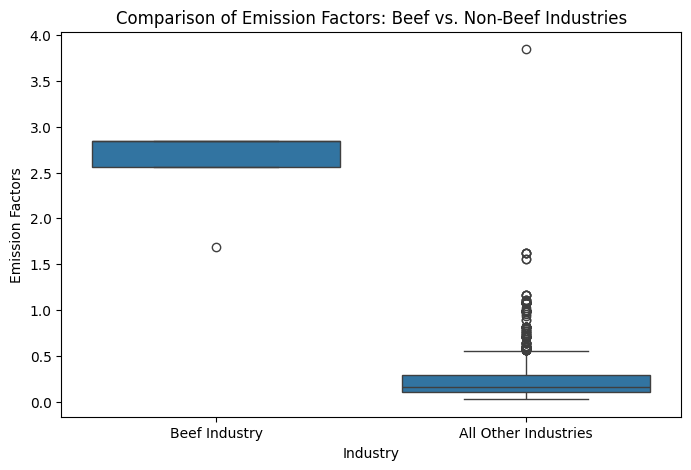

In [ ]:
beef_industry['Industry'] = 'Beef Industry'
emissions_without_beef['Industry'] = 'All Other Industries'

combined_data = pd.concat([beef_industry, emissions_without_beef])

plt.figure(figsize=(8, 5))
sns.boxplot(x='Industry', y='Supply Chain Emission Factors without Margins', data=combined_data)

plt.xlabel('Industry')
plt.ylabel('Emission Factors')
plt.title('Comparison of Emission Factors: Beef vs. Non-Beef Industries')

plt.show()

#### It Becomes clear from the above graphs that the average emissions from the beef and cattle industry are quite a bit higher than all other industries.

### Compare Margins

Margins are the GHGs emitted during the parts of distribution which are not directly linked to production. Comparing the margins may be able to expose certain outliers with much higher margins than other producers.

In [75]:
margins = df.sort_values(by='Margins of Supply Chain Emission Factors', ascending=False)
# margins = df['Margins of Supply Chain Emission Factors'].sort_values(ascending=False)
# print(f"Mean: {margins.mean()}")
# print(f"Median: {margins.median()}")
# print(f"Mode: {margins.mode()}")
margins.head(10)

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
82,212325,Clay and Ceramic and Refractory Minerals Mining,All GHGs,"kg CO2e/2022 USD, purchaser price",0.184,0.125,0.309,2123A0
86,212399,All Other Nonmetallic Mineral Mining,All GHGs,"kg CO2e/2022 USD, purchaser price",0.184,0.125,0.309,2123A0
85,212393,Other Chemical and Fertilizer Mineral Mining,All GHGs,"kg CO2e/2022 USD, purchaser price",0.184,0.125,0.309,2123A0
79,212321,Construction Sand and Gravel Mining,All GHGs,"kg CO2e/2022 USD, purchaser price",0.184,0.125,0.309,2123A0
80,212322,Industrial Sand Mining,All GHGs,"kg CO2e/2022 USD, purchaser price",0.184,0.125,0.309,2123A0
81,212324,Kaolin and Ball Clay Mining,All GHGs,"kg CO2e/2022 USD, purchaser price",0.184,0.125,0.309,2123A0
84,212392,Phosphate Rock Mining,All GHGs,"kg CO2e/2022 USD, purchaser price",0.184,0.125,0.309,2123A0
83,212391,"Potash, Soda, and Borate Mineral Mining",All GHGs,"kg CO2e/2022 USD, purchaser price",0.184,0.125,0.309,2123A0
294,327992,Ground or Treated Mineral and Earth Manufacturing,All GHGs,"kg CO2e/2022 USD, purchaser price",0.375,0.121,0.497,327992
68,212113,Anthracite Mining,All GHGs,"kg CO2e/2022 USD, purchaser price",0.747,0.094,0.841,212100


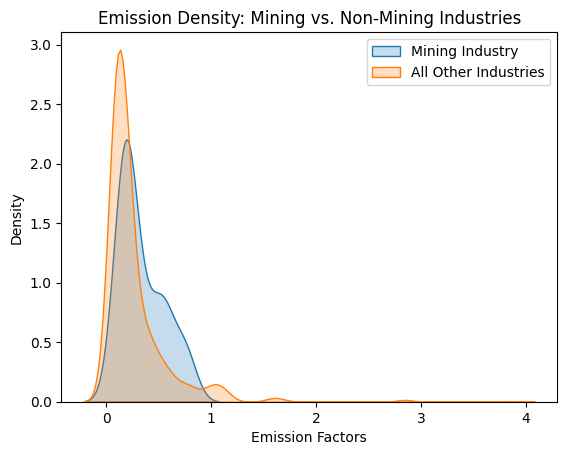

In [82]:
mining_industry = df[df['2017 NAICS Title'].str.contains('Mining', case=False)].copy()
margins_without_mining = df[~df['2017 NAICS Title'].str.contains('Mining', case=False)].copy()

sns.kdeplot(mining_industry['Supply Chain Emission Factors without Margins'], label='Mining Industry', fill=True)
sns.kdeplot(margins_without_mining['Supply Chain Emission Factors without Margins'], label='All Other Industries', fill=True)


plt.xlabel('Emission Factors')
plt.ylabel('Density')
plt.title('Emission Density: Mining vs. Non-Mining Industries')
plt.legend()
plt.show()

#### The above graph allows us to draw an interesting conclusion. It would seem that the mining industry, while not releasing that many emissions during production, releases the most emissions during non-production related transport of

# Conclusions

During this analysis of Greenhouse Gas emissions produced by various industries there seem to be certain trends among the data. The first trend explored was the beef and cattle industry's emissions. It was found that the Beef and Cattle industry produce some of the most emissions during the raw production process than most other industries. Cement, however, found itself at the top of the emission production list. The next trend was found while trying to answer the question "Which Industry produces the most GHG emissions during non purely production related processes?" The answer was the mining industry. While the mining industry may not create the most emissions during production, it does produce the most with its marginal processes.